In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_data.csv')

df.drop(columns=['Ticket', 'Name', 'Cabin', 'PassengerId'])

# Removing NaN values
df = df.fillna(0)

# Replaces: Male = 0 and Female = 1
gender = {"male": 0, "female": 1}
df = df.replace({"Sex":gender})

# Replaces: Embarked C = 0, Q = 1, S = 2
gate = {"C":0, "Q":1, "S":2}
df = df.replace({"Embarked":gate})

# Extracting the significant features of the dataframe
X = np.array(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
y = np.array(df[['Survived']])
y = np.squeeze(y)

# Calculating the correlation of the features and the output
Pclass_corr = np.corrcoef(X[:,0],y)
Sex_corr = np.corrcoef(X[:,1],y)
Age_corr = np.corrcoef(X[:,2],y)
SibSp_corr = np.corrcoef(X[:,3],y)
Parch_corr = np.corrcoef(X[:,4],y)
Fare_corr = np.corrcoef(X[:,5],y)
Embarked_corr = np.corrcoef(X[:,6],y)

print("Correlations coeficient between features and the output:\n")
print("Pclass: {}".format(Pclass_corr[0,1]))
print("Sex {}".format(Sex_corr[0,1]))
print("Age {}".format(Age_corr[0,1]))
print("SipSp {}".format(SibSp_corr[0,1]))
print("Parch {}".format(Parch_corr[0,1]))
print("Fare {}".format(Fare_corr[0,1]))
print("Embarked {}".format(Embarked_corr[0,1]))
X.shape

Correlations coeficient between features and the output:

Pclass: -0.3384810359610147
Sex 0.5433513806577551
Age 0.010539215871285656
SipSp -0.03532249888573558
Parch 0.08162940708348365
Fare 0.2573065223849623
Embarked -0.1741992460782486


(891, 7)

#### Based on the correlation coeficient it is possible to observe that the most significant feature is Sex and the second is Fare, although this one does not have a strong relationship. 

In [2]:
# Eliminating all features of X but Sex and Fare.
X = X[:,[1,5]]


In [3]:
# # creating C with exponential values
# C = []
# for i in range(1,21):
#     C.append(i*i)

# parameters = {'kernel':['poly','rbf', 'sigmoid'], 'C':C, 'degree':list(range(1,11))}

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 40)
X.shape

(891, 2)

In [11]:
# from sklearn.model_selection import ShuffleSplit

# cv_sets = ShuffleSplit(n_splits = 10, test_size= 0.20, random_state = 40)

In [5]:
from sklearn.svm import SVC

clf = SVC(C=225, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F1 score is: 0.7702702702702704
Accuracy is: 0.8100558659217877
ROC Auc Score is:0.8021844660194176
MSE between true y and predicted y is: 0.18994413407821228
R2 score is: 0.2225344915687275
Confusion Matrix is: 
[[88 15]
 [19 57]]


Text(0.5, 1.0, 'ROC Curve')

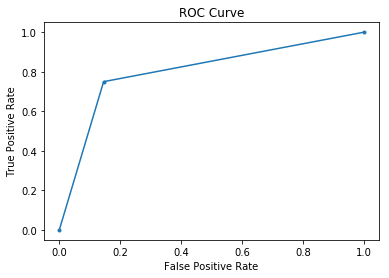

In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

f1_sc = f1_score(y_test, y_pred)
print("F1 score is: {}".format(f1_sc))

acc = accuracy_score(y_test, y_pred)
print("Accuracy is: {}".format(acc))

roc_sc = roc_auc_score(y_test, y_pred)
print("ROC Auc Score is:{}".format(roc_sc))

MSE = mean_squared_error(y_test, y_pred)
print("MSE between true y and predicted y is: {}".format(MSE))

r2_sc = r2_score(y_test, y_pred)
print("R2 score is: {}".format(r2_sc))

cf_matx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: \n{}".format(cf_matx))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [13]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score

# scorer = make_scorer(f1_score)

In [ ]:
# from sklearn.model_selection import GridSearchCV 

# # create the object
# grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = cv_sets)

# # fit the data
# grid_fit = grid_obj.fit(X_train, y_train)

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

In [ ]:
# best_clf = grid_fit.best_estimator_
# print(best_clf)